In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(314)
N = 100
alpha_real = 2.5
beta_real = 0.9
eps_real = np.random.normal(0, 0.5, size=N)

x = np.random.normal(10, 1, N)
y_real = alpha_real + beta_real * x
y = y_real + eps_real


Text(0.5, 0, '$y$')

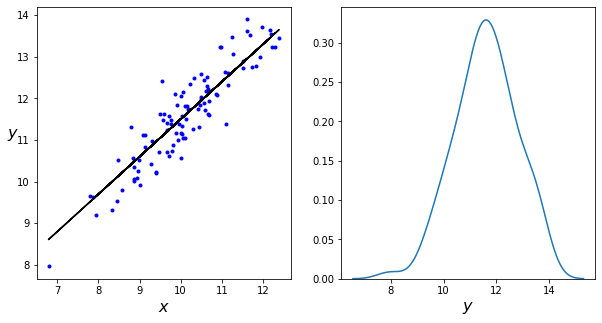

In [3]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(x,y, 'b.')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16, rotation=0)
plt.plot(x,y_real, 'k')
plt.subplot(1,2,2)
sns.kdeplot(y)
plt.xlabel('$y$', fontsize=16)



In [7]:
import pymc3 as pm
import scipy.stats as stats

with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=1)
    epsilon = pm.HalfCauchy('epsilon', 5)

    mu = pm.Deterministic('mu', alpha + beta * x)
    y_pred = pm.Normal('y_pred', mu=mu, sd=epsilon, observed=y)

    start = pm.find_MAP()
    step = pm.Metropolis(scaling=100)
    trace = pm.sample(11000, step, start)


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [epsilon]
>Metropolis: [beta]
>Metropolis: [alpha]


Sampling 2 chains for 1_000 tune and 11_000 draw iterations (2_000 + 22_000 draws total) took 5 seconds.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd9f43e7cd0>,
      dtype=object)

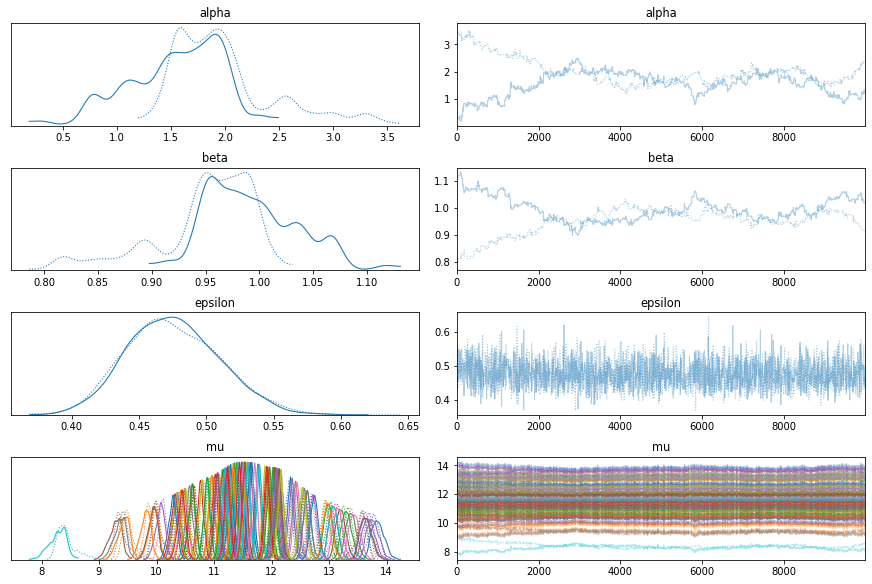

In [8]:
trace_n = trace[1000:]
pm.traceplot(trace_n)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd9f6120a90>,
      dtype=object)

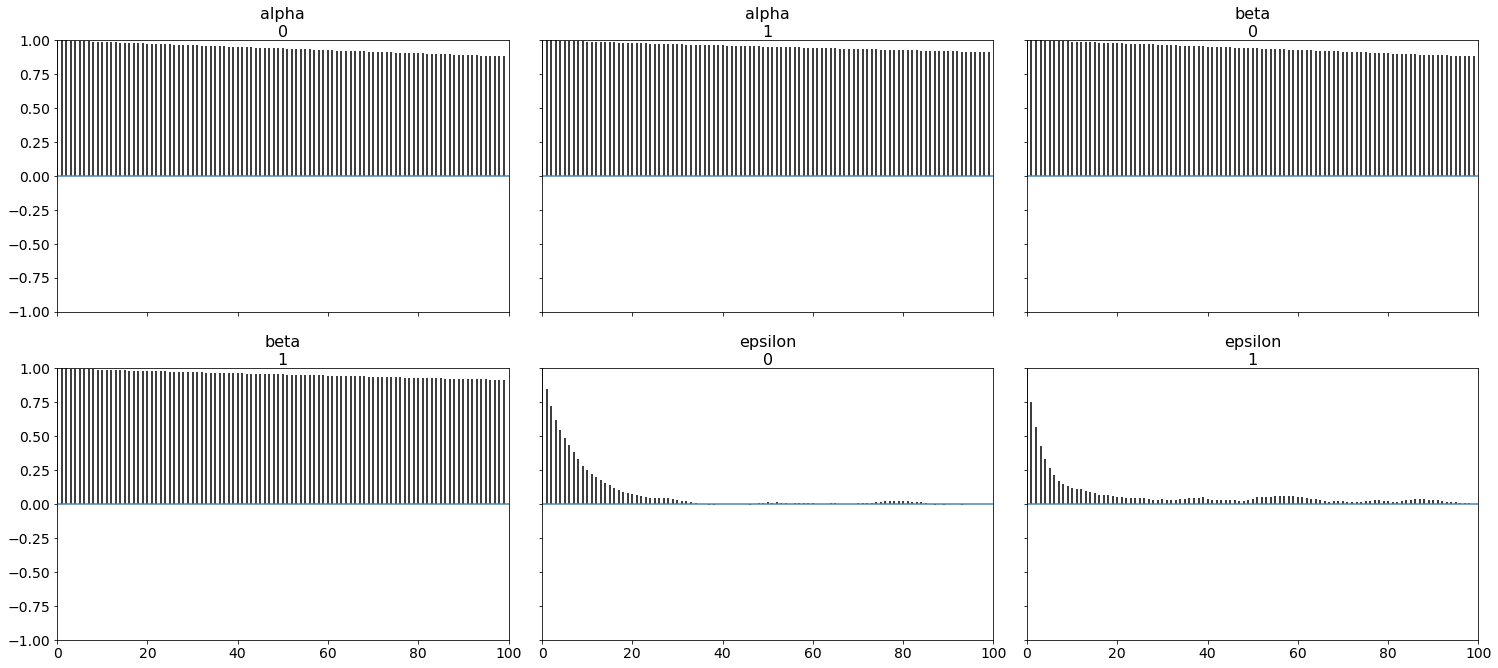

In [9]:
varnames = ['alpha', 'beta', 'epsilon']
pm.autocorrplot(trace_n, varnames)


In [10]:
pm.summary()

TypeError: summary() missing 1 required positional argument: 'data'

Text(0, 0.5, '$\\beta$')

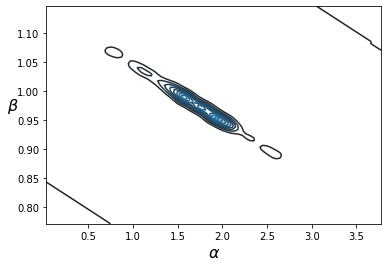

In [11]:
sns.kdeplot(trace_n['alpha'], trace_n['beta'])
plt.xlabel(r'$\alpha$', fontsize=16)
plt.ylabel(r'$\beta$', fontsize=16, rotation=0)
